In [1]:
import pandas as pd
import numpy as np

In [2]:
marks = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')
marks.head(1)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.5


In [3]:
marks.count()

Prefix        99
Assignment    97
Tutorial      87
Midterm       83
TakeHome      90
Final         94
dtype: int64

In [4]:
marks.shape

(99, 6)

In [5]:
num_rows = marks.shape[0]
num_missing = num_rows - marks.count()
print(num_missing)

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64


In [6]:
marks.isnull().sum()

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64

In [7]:
marks[marks.isnull().sum(axis=1)!=5]

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


In [8]:
# column wise summing up the missing values
round(100*(marks.isnull().sum()/len(marks.index)), 2)

Prefix         0.00
Assignment     2.02
Tutorial      12.12
Midterm       16.16
TakeHome       9.09
Final          5.05
dtype: float64

In [9]:
marks = marks.drop('Tutorial', axis=1)

In [10]:
marks=marks[~marks['Midterm'].isnull()]
round(100*(marks.isnull().sum()/len(marks.index)), 2)

Prefix        0.00
Assignment    0.00
Midterm       0.00
TakeHome      1.20
Final         3.61
dtype: float64

### Filling with 0

In [11]:
marks.fillna(0).iloc[0:1,0:5]

,Prefix,Assignment,Midterm,TakeHome,Final
0,5,57.14,64.38,51.48,52.5


In [12]:
marks.fillna(method='ffill').iloc[0:1,0:5]

,Prefix,Assignment,Midterm,TakeHome,Final
0,5,57.14,64.38,51.48,52.5


In [13]:
nba = pd.read_csv('data/nba.csv')
nba.head(1)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0


In [14]:
nba = nba.dropna(how='all')

In [15]:
nba = nba.dropna(subset=['Salary'])

Use `astype('category')` for columns with very less unique values.

## Importing Data 

```python
pd.read_csv(filename) # From a CSV file
pd.read_table(filename) # From a delimited text file (like TSV)
pd.read_excel(filename) # From an Excel file
pd.read_sql(query, connection_object) # Reads from a SQL table/database
pd.read_json(json_string) # Reads from a JSON formatted string, URL or file.
pd.read_html(url) # Parses an html URL, string or file and extracts tables to a list of dataframes
pd.read_clipboard() # Takes the contents of your clipboard and passes it to read_table()
pd.DataFrame(dict) # From a dict, keys for columns names, values for data as lists
```

## Exploring data

```python
df.shape() # Prints number of rows and columns in dataframe
df.head(n) # Prints first n rows of the DataFrame
df.tail(n) # Prints last n rows of the DataFrame
df.info() # Index, Datatype and Memory information
df.describe() # Summary statistics for numerical columns
s.value_counts(dropna=False) # Views unique values and counts
df.apply(pd.Series.value_counts) # Unique values and counts for all columns
df.describe() # Summary statistics for numerical columns
df.mean() # Returns the mean of all columns
df.corr() # Returns the correlation between columns in a DataFrame
df.count() # Returns the number of non-null values in each DataFrame column
df.max() # Returns the highest value in each column
df.min() # Returns the lowest value in each column
df.median() # Returns the median of each column
df.std() # Returns the standard deviation of each column
```

## Selecting

```python
df[col] # Returns column with label col as Series
df[[col1, col2]] # Returns Columns as a new DataFrame
s.iloc[0] # Selection by position (selects first element)
s.loc[0] # Selection by index (selects element at index 0)
df.iloc[0,:] # First row
df.iloc[0,0] # First element of first column
```

## Data cleaning

```python
df.columns = ['a','b','c'] # Renames columns
pd.isnull() # Checks for null Values, Returns Boolean Array
pd.notnull() # Opposite of s.isnull()
df.dropna() # Drops all rows that contain null values
df.dropna(axis=1) # Drops all columns that contain null values
df.dropna(axis=1,thresh=n) # Drops all rows have have less than n non null values
df.fillna(x) # Replaces all null values with x
s.fillna(s.mean()) # Replaces all null values with the mean (mean can be replaced with almost any function from the statistics section)
s.astype(float) # Converts the datatype of the series to float
s.replace(1,'one') # Replaces all values equal to 1 with 'one'
s.replace([1,3],['one','three']) # Replaces all 1 with 'one' and 3 with 'three'
df.rename(columns=lambda x: x + 1) # Mass renaming of columns
df.rename(columns={'old_name': 'new_ name'}) # Selective renaming
df.set_index('column_one') # Changes the index
df.rename(index=lambda x: x + 1) # Mass renaming of index
```

## Filter, Sort and Group By

```python
df[df[col] > 0.5] # Rows where the col column is greater than 0.5
df[(df[col] > 0.5) & (df[col] < 0.7)] # Rows where 0.5 < col < 0.7
df.sort_values(col1) # Sorts values by col1 in ascending order
df.sort_values(col2,ascending=False) # Sorts values by col2 in descending order
df.sort_values([col1,col2], ascending=[True,False]) # Sorts values by col1 in ascending order then col2 in descending order
df.groupby(col) # Returns a groupby object for values from one column
df.groupby([col1,col2]) # Returns a groupby object values from multiple columns
df.groupby(col1)[col2].mean() # Returns the mean of the values in col2, grouped by the values in col1 (mean can be replaced with almost any function from the statistics section)
df.pivot_table(index=col1, values= col2,col3], aggfunc=mean) # Creates a pivot table that groups by col1 and calculates the mean of col2 and col3
df.groupby(col1).agg(np.mean) # Finds the average across all columns for every unique column 1 group
df.apply(np.mean) # Applies a function across each column
df.apply(np.max, axis=1) # Applies a function across each row
```

# Finding outlier

In [19]:
import scipy.stats

In [29]:
dummy_age = [20, 21, 24, 19, 23, 45, 34, 20, 30, 34, 45, 29, 100, 6]
dummy_height = [140, 150, 280, 170, 160, 150,
                159, 168, 167, 170, 169, 159, 160, 140]

dummy_df = pd.DataFrame(
    list(zip(dummy_age, dummy_height)), columns=['age', 'height'])
dummy_df

,age,height
0,20,140
1,21,150
2,24,280
3,19,170
4,23,160
5,45,150
6,34,159
7,20,168
8,30,167
9,34,170


In [30]:
# Calculate z-score

scipy.stats.zscore(dummy_df['height'])

array([-0.8321275 , -0.52715931,  3.43742721,  0.08277708, -0.22219111,
       -0.52715931, -0.25268793,  0.02178344, -0.00871338,  0.08277708,
        0.05228026, -0.25268793, -0.22219111, -0.8321275 ])

In [31]:
zscore_height = np.abs(scipy.stats.zscore(dummy_df['height']))

dummy_df.iloc[np.where(zscore_height>3)]

,age,height
2,24,280


### Z score can be effected by outlier as it depends on mean
### A better approach can be to use Median Absolute Deviation (MAD)

### Using IQR to identify outliers

In [32]:
def get_lower_upper_bound(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [33]:
def get_outlier_iqr(data):
    lower, upper = get_lower_upper_bound(data)
    return data[np.where((data > upper) | (data < lower))]

In [34]:
get_outlier_iqr(dummy_df['height'].values)

array([280])

In [35]:
get_outlier_iqr(dummy_df['age'].values)

array([100])

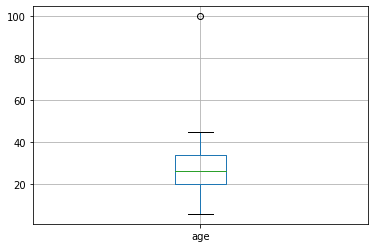

In [38]:
dummy_df.boxplot(column='age')